## Auto Encoder

Auto Encoder는 Bottleneck 구조를 이용해 항등 함수 $Y = F(Y)$를 근사하도록 구조를 훈련시키는 self-supervised Deep learning Model이다.이는 $\hat{Y} = F_{W,b}(Y)$ 모델을 적합화해서 $Y$를 재현할 때 필요한 정보를 매우 효율적으로 압축하고자 하는 것을 의미한다. 다르게 말하면 Auto encoder는 훨씬 더 비용 효과적인 $Y$의 표현을 생성하는 한 형태의 압축이다.

Auto Encoder의 출력층은 입력층과 동일한 수의 노드를 갖고 비용 함수는 재구축 오차, 즉 $Y - \hat{Y}$의 어떤 척도이다. Auto Encoder는 종종 차원 축소와 잡음 축소의 목적으로 사용된다. 차원 축소를 구현하는 단순 Auto Encoder는 Bottleneck으로 기능한 더 작은 수의 노드를 가진 적어도 하나의 은닉층을 가진 Feedforward Auto Encoder이다. Back Propagation을 사용해 신경망을 훈련한 후 2개의 부분으로 분리된다. Bottle neck까지의 층은 encoder로 사용되고 나머지 층은 decoder로 사용된다. 가장 간단한 경우 단 하나의 hidden layer(bottle neck)이 있고 신경망의 계층들은 완전 결합된다. Auto encoder의 압축 능력은 엄청나게 많이 사용되는 주성분 분석의 비모수 비선형 대체 모델로서 금융에서의 응용을 고무시킨다. Baldi와 Hornik(1989)의 선구적 연구 이래 Auto Encoder가 PCA와 밀접하게 연관돼 있다는 것은 잘 알려졌다. 우리는 Plaut(2018)를 따라 간략한 개요로 시작한 후 어떻게 정확하게 Linear Auto Encoder가 PCA를 가능하게 하는지를 보여준다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

### 1. Linear Auto Encoder

비선형 활성 함수가 사용되지 않는 경우 $\mathbf{x}_i = W^{(1)}\mathbf{y}_i = b^{(1)}$이고, $\hat{\mathbf{y}}_i = W^{(2)}\mathbf{x}_i + b^{(2)}$이다. 비용 함수가 출력과 입력 간의 차이의 총 제곱이면 입력 데이터 행렬 $Y$에 대해 Autoencoder를 훈련해 다음 문제를 푼다.

$$\min_{W^{(1)}, b^{(1)}, W^{(2)}, b^{(2)}} \left\Vert Y - \left( W^{(2)} \left(W^{(1)}Y + \mathbf{b}^{(1)} \mathbb{1}_N^T \right) + \mathbf{b}^{(2)}\mathbb{1}_N^T\right)+ \mathbf{b}^{(2)} \mathbb{1}_N^T \right\Vert_F^2$$

$b_2$에 대한 편미분을 0으로 놓고, 해를 위 식에 넣으면 문제는 다음과 같이 된다.

$$\min_{W^{(1)}, W^{(2)}} \left\Vert Y_0 - W^{(2)}W^{(1)}Y_0\right\Vert_F^2$$

따라서 임의의 $b_1$에 대해 최적 $b_2$는 문제가 $b_1$과 $\bar{y}$에 대해 독립이 되게 하는 것이다. 따라서 가중치 $W^{(1)}$과 $W^{(2)}$에만 초점을 맞춘다.

Linear Auto Encoder는 가중치 행렬의 열이 직교가 아니더라도 직교 투영을 준다. 이를 보고자 그래디언트를 0으로 놓고 $W^{(1)}$은 $W^{(2)}$의 좌측 Moore-Penrose pseudoinverse matrix이다. $W^{(2)}$은 $W^{(1)}$의 우측 pseudoinverse matrix이다.

$$W^{(1)} = \left( W^{(2)}\right)^T  = \left( W^{(2)}^T W^{(2)}\right)^{-1} \left( W^{(2)}\right)^T$$

single matrix에 대한 최소화는 다음과 같다.

$$\min_{W^{(2)} \in \mathbb{R}^{n \times m}} \left\Vert Y_0 - W^{(2)} \left(W^{(2)}\right)^T Y_0 \right\Vert_F^2$$

행렬 $W^{(2)}\left(W^{(2)}\right)^T = W^{(2)} \left(\left(W^{(2)}\right)^TW^{(2)}\right)^{-1}\left(W^{(2)}\right)^T$은 $W^{(2)}$의 열 공간에의 직교 투영 연산자며, 열들이 반드시 직교가 아닐 때도 성립한다. 문제는 PCA의 제약식

$$\min_{W \in \mathbb{R}^{n \times m}} \left\Vert Y_0 - WW^TY_0\right\Vert_F^2 \qquad \text{s.t.} \qquad W^TW = I_{n \times m}$$

과 매우 유사하지만 직교성 제약식이 없다. 열 공간이 $Y$의 처음 $m$개의 로딩 벡터에 의해 생성된다면 또한 이 경우에만 $W^{(2)}$이 Auto encoder의 제약식을 최소화하는 것을 보일 수 있다.

출력이 데이터의 저차원 주성분 부분공간으로의 투영이란 의미에서 Linear Encoder는 PCA를 입력 데이터에 적용한다고 얘기할 수 있다. 그러나 실제 PCA와 달리 Bottleneck의 출력 좌표는 상관관계를 가지며 내림차순의 분산으로 정렬되지 않는다. 상이한 차원으로의 축소하는 해는 중첩되지 않는다. 즉, 차원 $n$에서 차원 $m_1$으로 데이터를 축소시킬 때 처음 $m_2$벡터 $(m_2 < m_1)$은 차원 $n$에서 $m_2$로 축소할 때의 최적 해가 아니다. 따라서 전적으로 새로운 Auto Encoder를 훈련해야 한다.

### 2. PCA와의 동등성

처음 $m$개의 로딩 벡터는 식 

$$\min_{W^{(2)} \in \mathbb{R}^{n \times m}} \left\Vert Y_0 - W^{(2)} \left(W^{(2)}\right)^T Y_0 \right\Vert_F^2$$

을 최소화하는 행렬의 처음 $m$개의 좌특이 벡터이다.

증명의 스케치는 다음과 같다. 원 데이터 세트 $Y$에 대해 Linear Auto Encoder를 훈련하고 나서 전형적으로 $m \ll N$인 $W^{(2)} \in \mathbb{R}^{n \times m}$의 처음 $m$개 좌특이 벡터를 계산한다. 로딩 벡터 역시 특이값 분해에 의해 hidden layer의 가중치 $W^{(1)}$으로부터 복구될 수 있다. $W^{(2)} = U\Sigma V^T$이고 이것이 Full Rank이면 다음을 얻는다.

$$
\begin{align}
W^{(1)} = & \left( W^{(2)}\right)^T = V \Sigma^T U^T \\
W_2W_2^T = & U\Sigma V^T V \Sigma^T U^T = U \Sigma \Sigma^T U^T = U_m U_m^T
\end{align}
$$

여기서 $\left( V^T \right)^T = V$라는 사실을 사용하고 $\Sigma^T \in \mathbb{R}^{m \times n}$은 대각 원소가 $\frac{1}{\sigma_j}$인 행렬이다. 행렬 $\Sigma \Sigma^T$은 처음 $m$개의 대각 원소가 1이고 다른 $n-m$개의 원소는 0인 대각 행렬이다. 행렬 $U_m \in \mathbb{R}^{n \times m}$은 열이 $W_2$에서 처음 $m$개의 좌특이 벡터인 행렬이다. 따라서 $\left( W^{(i)} \right)^T \in \mathbb{R}^{n \times m}$에서 처음 $m$개의 좌특이 행렬이 $Y$에서 처음 $m$개의 로딩 벡터와 같다.

PCA의 공통 응용은 고정 소득(채권) 모델링이다. 즉, 주성분은 수익률 곡선의 일간 움직임을 특성화하는데 사용된다. 주성분이 곡선에서 대부분의 변동성을 설명하기 때문에 투자가들은 상이한 섹터로부터 단지 몇 개의 채권 상품으로 노출도를 헤징할 수 있다. 

In [2]:
tickers = ['DGS3MO','DGS6MO','DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS20','DGS30']
bond_rate = pd.DataFrame()

for ticker in tickers:
    bond_rate = pd.concat(
        [
            bond_rate,
            pdr.get_data_fred(
                ticker,
                start = '2000-01-01',
                end = pd.to_datetime('today')
            )
        ], axis = 1
    )

In [3]:
bond_rate = bond_rate.resample('W-FRI').last() * 0.01

아래의 그림은 25년 기간에 걸친 수익률 곡선을 보여 주는데, 여기서 각 선은 채권에서 기간 구조의 각 만기에 해당한다.

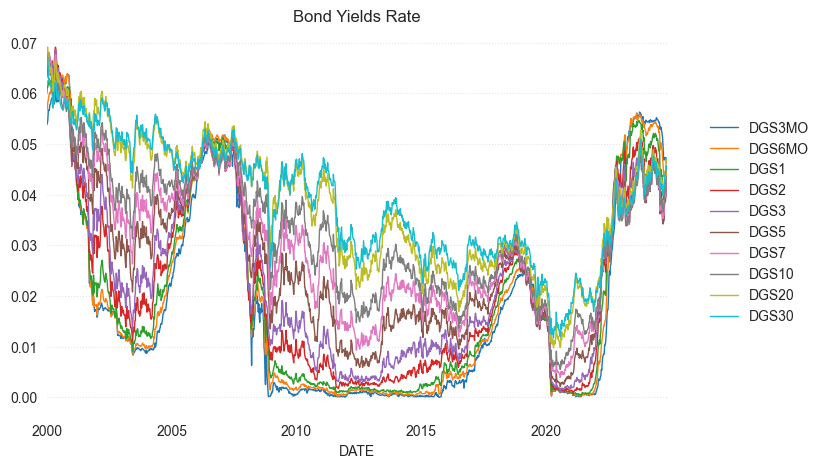

In [4]:
fig, ax = plt.subplots(figsize = (8, 5))
bond_rate.plot(ax = ax, lw = 1)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5), frameon = False)
plt.title(r'Bond Yields Rate')
plt.show()

아래 그림은 2000년부터 25년간의 채권 수익률 곡선의 변화를 시각화한 것이다. IT 버블과 금융위기 직전 2006~2007년 사이에 장단기 금리가 역배열이 되는 현상을 볼 수 있다.

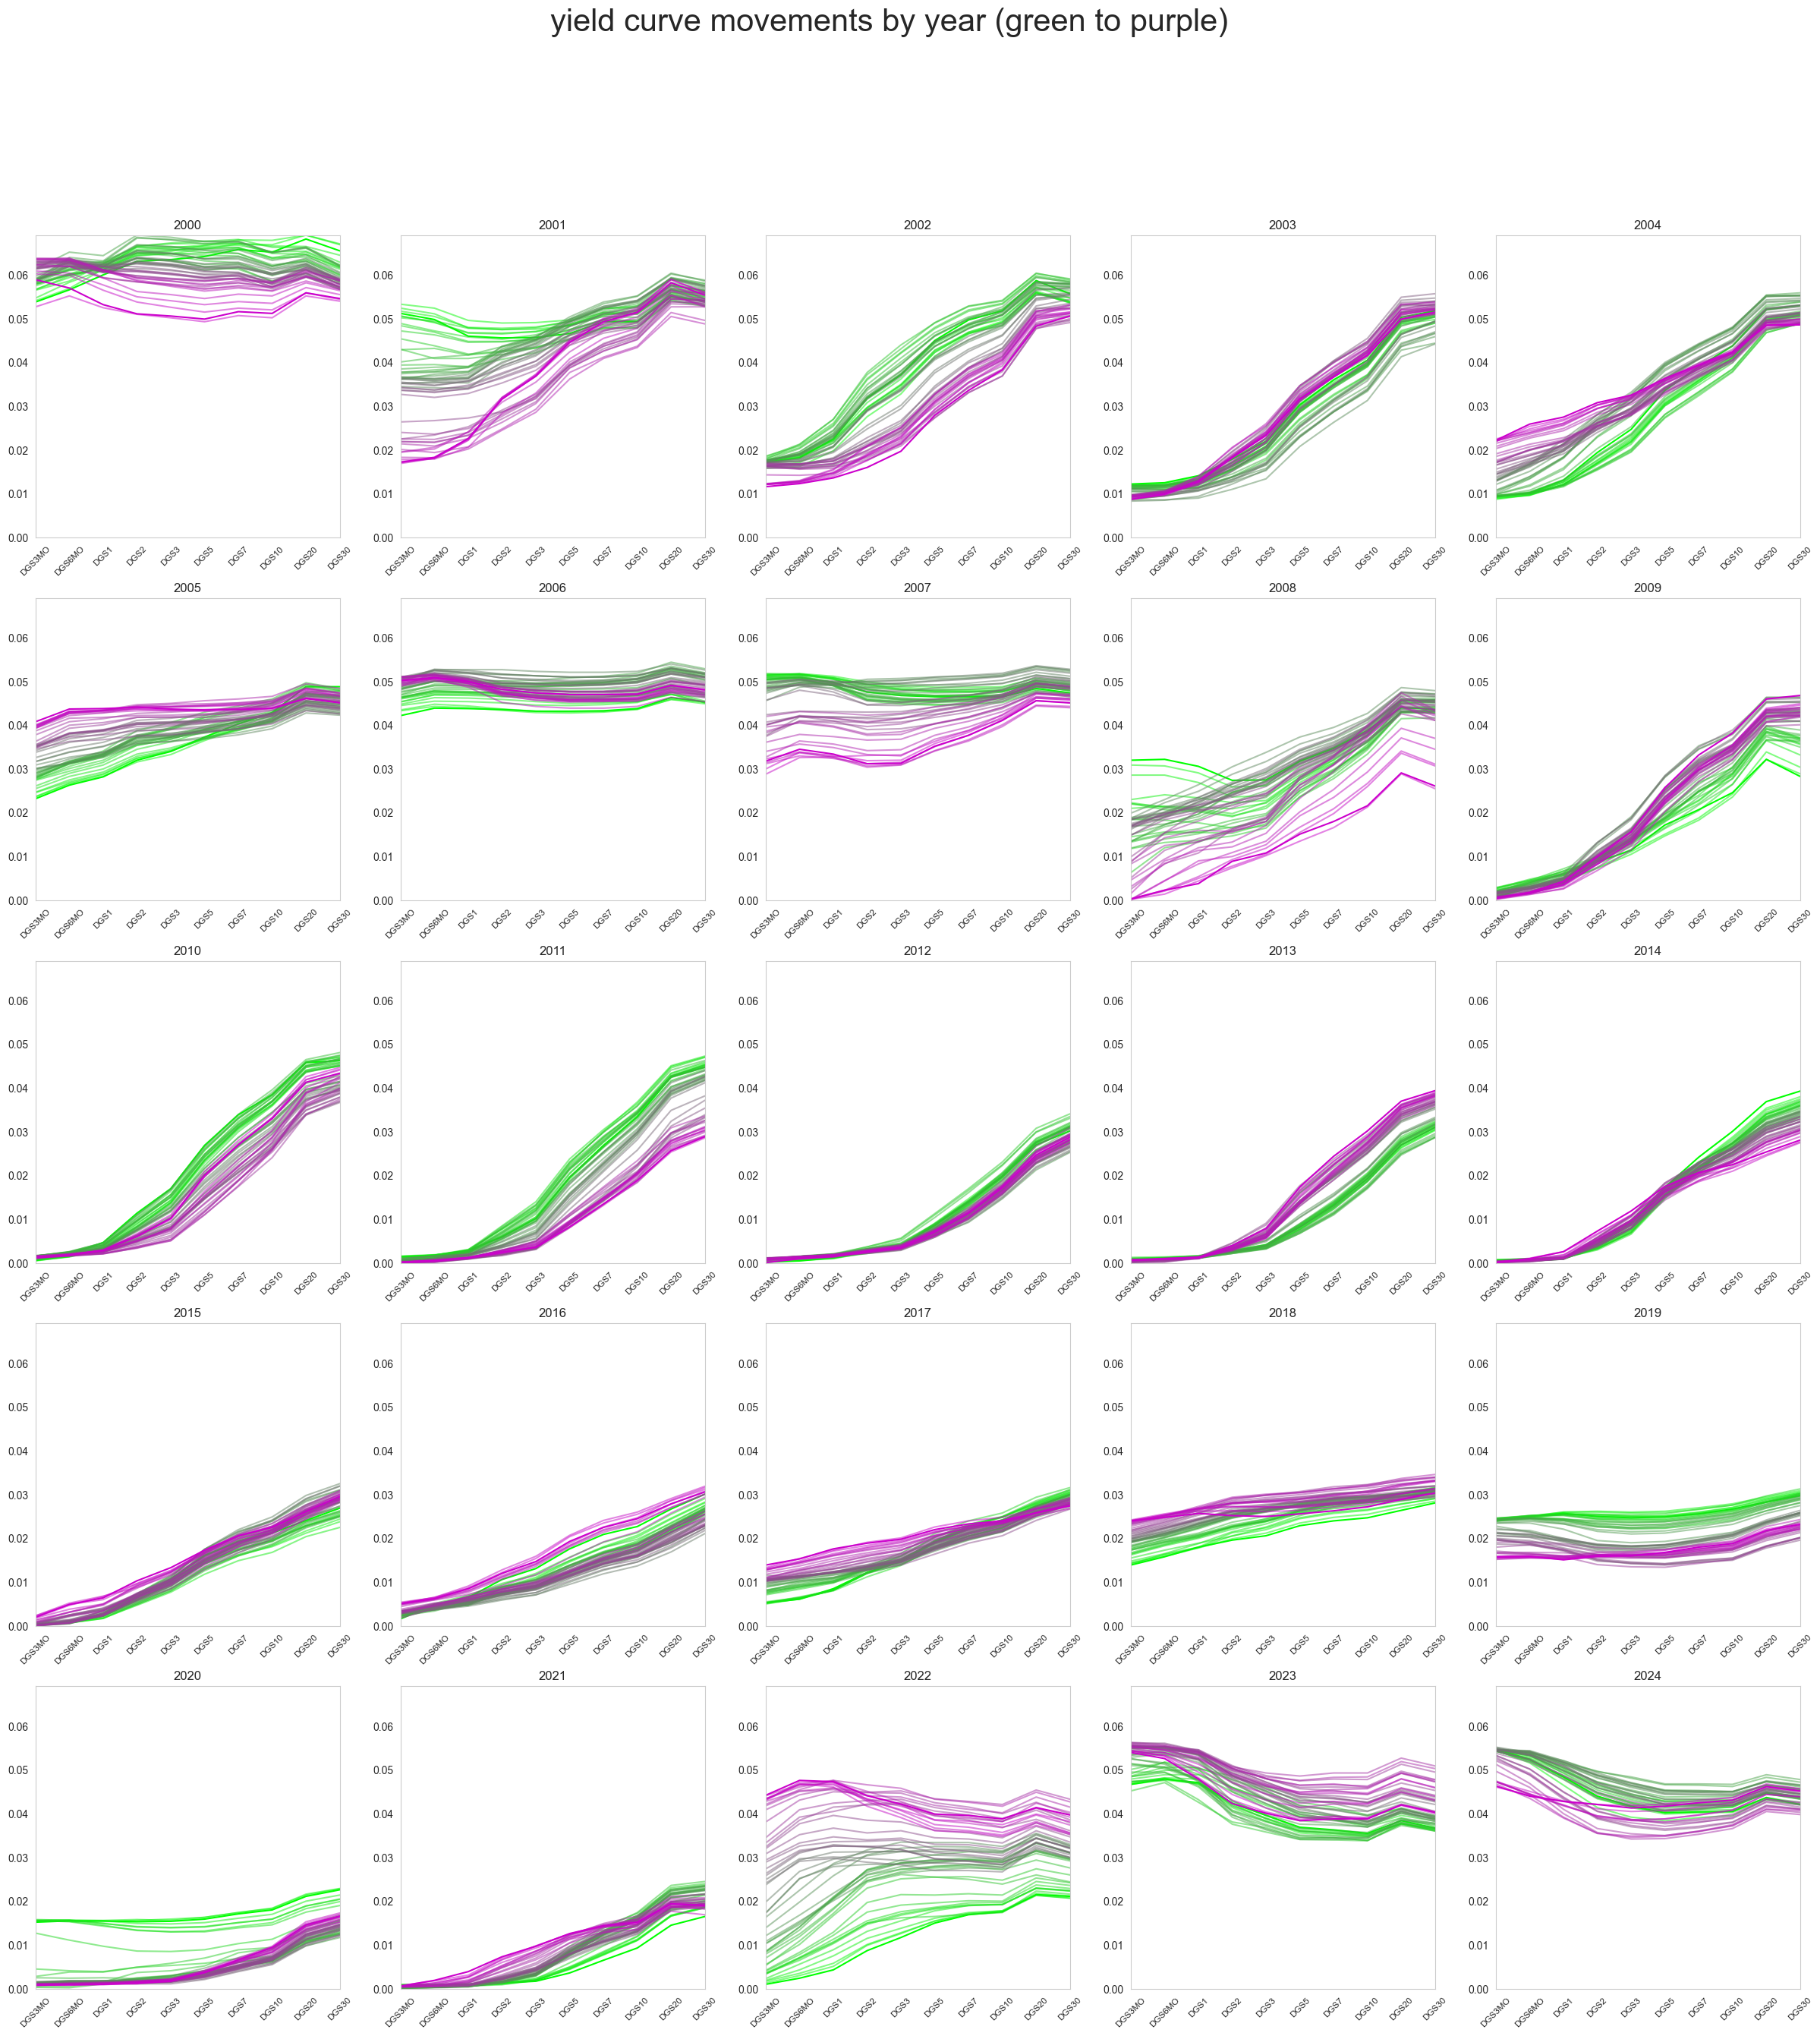

In [5]:
cols = 5
num_years = bond_rate.index.max().year - bond_rate.index.min().year
rows = int(np.ceil(num_years/cols))

plt.figure(figsize = (30, (30 / cols) * rows))
plt.suptitle('yield curve movements by year (green to purple)', fontsize = 30)

colnum = 0
rownum = 0
for year in range(bond_rate.index.min().year, bond_rate.index.max().year+1):
    year_start = f'{year}-01-01'
    year_end = f'{year}-12-31'
    
    plt.subplot2grid((rows, cols), (rownum, colnum), colspan=1, rowspan=1)
    plt.title('{0}'.format(year))
    plt.xlim(0, len(bond_rate.columns)-1)
    plt.ylim(np.min(bond_rate.values), np.max(bond_rate.values))
    plt.grid(False)
    plt.xticks(range(len(bond_rate.columns)), bond_rate.columns, size='small', rotation = 45)
    
    year_curves = bond_rate.loc[year_start:year_end].values    
    gradient = np.linspace([0, 1, 0, 1], [0.8, 0, 0.8, 1], year_curves.shape[0])
    gradient[1:-1, -1] = 0.5
    
    for y, colour in zip(year_curves, gradient):
        plt.plot(y, c=colour)

    if colnum != cols-1:
        colnum += 1
    else:
        colnum = 0
        rownum += 1

#### Principal Conponents Analysis

전통적 PCA를 이용해서 차원축소를 진행한다. 주성분은 3개로 축약하도록 한다

In [6]:
from sklearn.decomposition import PCA

pca_model = PCA(
    n_components = 3, 
    copy = True, 
    whiten = False
)
pca_model.fit(bond_rate)

PCA(n_components=3)

In [7]:
df_pca = pd.DataFrame(
    pca_model.transform(bond_rate),
    index = bond_rate.index
)
df_pca_recon = pd.DataFrame(
    pca_model.inverse_transform(df_pca),
    index = bond_rate.index,
    columns = bond_rate.columns
)

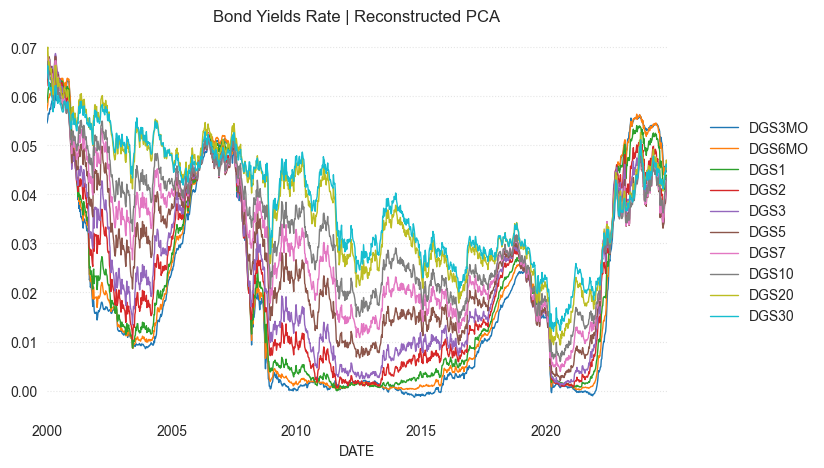

In [8]:
fig, ax = plt.subplots(figsize = (8, 5))
df_pca_recon.plot(ax = ax, lw = 1)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5), frameon = False)
plt.title(r'Bond Yields Rate | Reconstructed PCA')
plt.show()

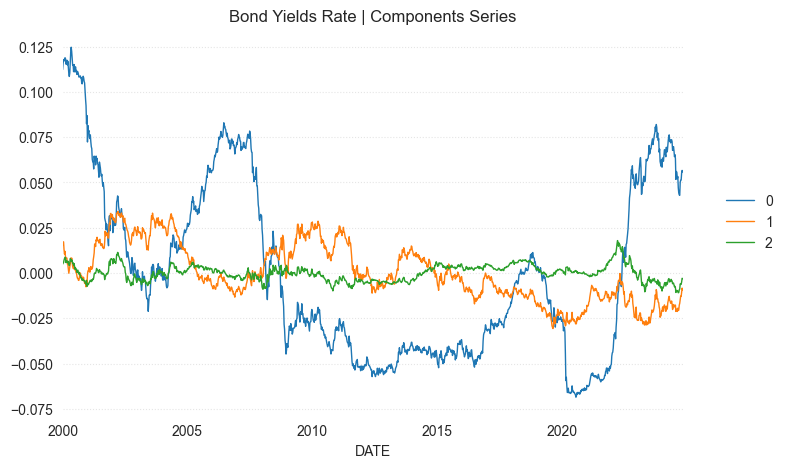

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))
df_pca.plot(ax = ax, lw = 1)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5), frameon = False)
plt.title(r'Bond Yields Rate | Components Series')
plt.show()

In [10]:
df_pca_recon - bond_rate.values

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,
2000-01-07,0.000715,0.000509,-0.001285,-0.000967,0.000203,0.001141,0.000213,0.000064,0.000061,-0.000756
2000-01-14,0.000768,0.000775,-0.001733,-0.000953,0.000319,0.001053,0.000473,-0.000236,0.000456,-0.001067
2000-01-21,0.000800,0.000025,-0.000983,-0.000700,0.000457,0.000847,0.000125,-0.000737,0.000919,-0.000871
2000-01-28,-0.000030,0.000922,-0.000986,-0.000563,0.000429,0.000593,0.000095,-0.000959,0.001166,-0.000783
2000-02-04,-0.000136,0.000371,-0.000033,-0.000734,0.000386,0.000652,-0.000221,-0.000766,0.000677,-0.000243
...,...,...,...,...,...,...,...,...,...,...
2024-10-11,-0.001667,0.000904,0.001194,0.000265,-0.000186,-0.000639,-0.000387,-0.000183,0.000263,0.000498
2024-10-18,-0.001620,0.000860,0.001158,0.000330,-0.000229,-0.000610,-0.000381,-0.000201,0.000217,0.000543
2024-10-25,-0.001449,0.000748,0.001071,0.000313,-0.000262,-0.000531,-0.000293,-0.000256,0.000279,0.000434


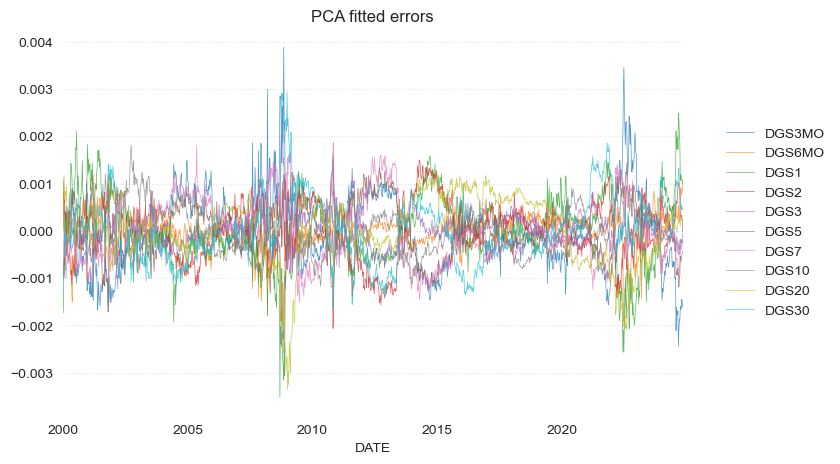

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
(df_pca_recon - bond_rate.values).plot(
    lw = 0.5,
    alpha = 0.75,
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5), frameon = False)
plt.title(r'PCA fitted errors')
plt.show()

In [24]:
for i, pc in enumerate(pca_model.explained_variance_ratio_):
    print('PC {0}:\t{1:5.2f}%'.format(i+1, pc * 100.0))

PC 1:	89.54%
PC 2:	 9.57%
PC 3:	 0.75%


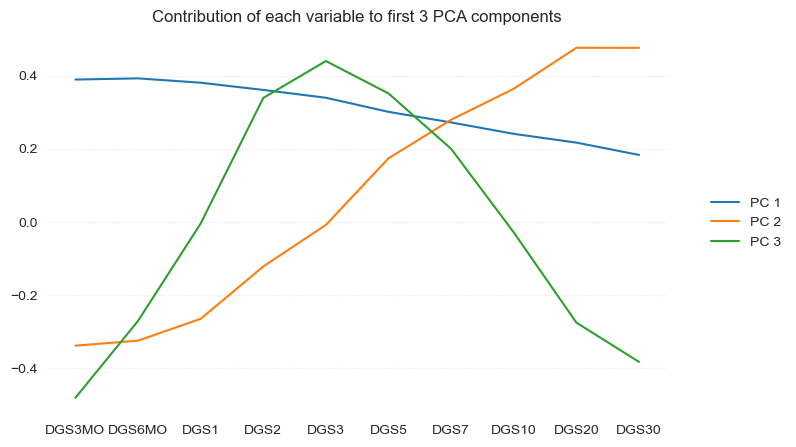

In [26]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(np.transpose(pca_model.components_[0]), label = 'PC 1')
ax.plot(np.transpose(pca_model.components_[1]), label = 'PC 2')
ax.plot(np.transpose(pca_model.components_[2]), label = 'PC 3')
ax.set_xticks(range(len(bond_rate.columns)), bond_rate.columns)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5), frameon = False)
plt.title('Contribution of each variable to first {0} PCA components'.format(pca_model.n_components))
plt.show()

#### Linear Autoencoder의 경우

선형 오토인코더를 이용해 차원을 축소해 보자. epochs는 1000, PCA와의 동등한 결과를 보기 위해 3개의 차원으로 축소한다.

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearAutoEncoder(nn.Module) :
    def __init__(
            self, input_dim, 
            hidden_dim
        ) -> None :
        super(LinearAutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)
        
    def forward(self, x) :
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [50]:
y = torch.tensor(
    bond_rate.values,
    dtype = torch.float32
) # convert to torch type

input_dim = y.shape[1]
hidden_dim = 3
learning_rate = 1e-3
regularization = 0 # l2 regularization
epochs = 1000
batch_size = 4

In [51]:
# initialize the model
model = LinearAutoEncoder(input_dim, hidden_dim)
criterion = nn.MSELoss() # l2 loss function
optimizer = optim.Adam(
    model.parameters(),
    lr = learning_rate,
    weight_decay = regularization
)

In [52]:
from tqdm import tqdm

for epoch in tqdm(range(epochs)) :
    model.train() # set a instance to train modes
    epoch_loss = 0
    permutation = torch.randperm(y.size(0))
    
    for i in range(0, y.size(0), batch_size) :
        indices = permutation[i:i + batch_size]
        batch_x = y[indices]
        
        optimizer.zero_grad() # initialize gradient
        outputs = model(batch_x)
        loss = criterion(outputs, batch_x) # caculate loss
        loss.backward() # backpropagation
        optimizer.step() # update params
        
        epoch_loss += loss.item()
    #avg_loss = epoch_loss / (y.size(0) // batch_size)
    #print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}')

100%|██████████| 1000/1000 [01:02<00:00, 16.12it/s]


In [55]:
w1 = model.encoder.weight.data.numpy()
b1 = model.encoder.bias.data.numpy()
w2 = model.decoder.weight.data.numpy()
b2 = model.decoder.bias.data.numpy()

# calculate SVD values
ae_decoder_lsv, _, _ = np.linalg.svd(w2, full_matrices = False)

In [56]:
mu = np.mean(
    bond_rate.values, 
    axis = 0
)
ae_lsv_projections = np.array(bond_rate.values - mu) @ ae_decoder_lsv

In [58]:
df_ae = pd.DataFrame(
    ae_lsv_projections, 
    index = bond_rate.index,
    columns = ['AE_01','AE_02','AE_03']
)

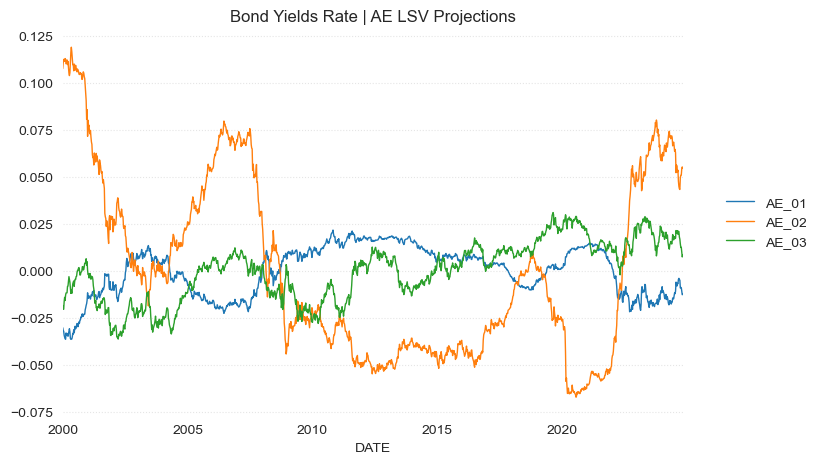

In [59]:
fig, ax = plt.subplots(figsize = (8, 5))
df_ae.plot(ax = ax, lw = 1)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5), frameon = False)
plt.title(r'Bond Yields Rate | AE LSV Projections')
plt.show()

#### Compared the Transformed sample covariances

sample covariance matrix C를 초기화하자.

In [60]:
C = np.dot(
    (bond_rate - mu).T, bond_rate - mu
)

In [61]:
total_variance = np.sum(np.diag(C))
print(f'total variance : {total_variance : .2f}')

total variance :  3.40


다음은 $m$ loading vector로 sample covariance matrix를 대각화한다.

$$P_m^T Y_0 Y_0^T P_m$$

아래의 그림들에서 수익률 곡선이 시계열에서 샘플 공분산 행렬의 주성분을 발견함으로써 비교를 보여줄 수 있다. 고유값은 변환된 행렬의 대각 원소들이고, 모두 양이고, 내림차순으로 정렬된다. 이 경우 $n > m$인 고차원 데이터 세트에서 처음 $m=3$ 주성분을 그렸다. 이들 성분에 귀속되는 분산의 비율은 각각 95.6%, 4.07%, 0.34%이다. 오토인코더의 가중치의 좌특이 벡터를 사용한 샘플 공분산 행렬의 보여주며, 

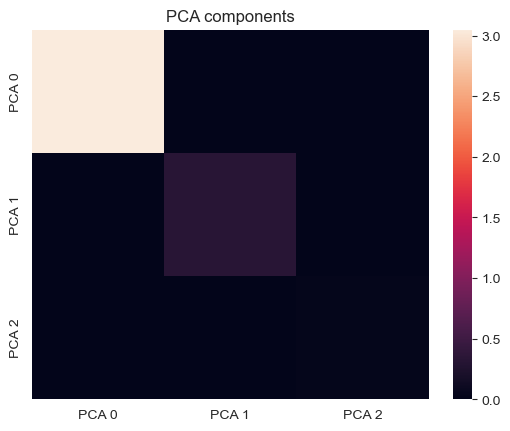

In [69]:
lambda_from_pca = pd.DataFrame(
    pca_model.components_ @ C @ pca_model.components_.T,
    index = ['PCA 0','PCA 1','PCA 2'],
    columns = ['PCA 0','PCA 1','PCA 2']
)

sns.heatmap(
    lambda_from_pca, 
    annot = False
)
plt.title('PCA components')
plt.show()

In [70]:
print(100 * np.diag(lambda_from_pca) / total_variance)
print('{:.6}% of total variance explained'.format(100 * np.sum(np.diag(lambda_from_pca)) / total_variance))

[89.53982194  9.57320124  0.74848465]
99.8615% of total variance explained


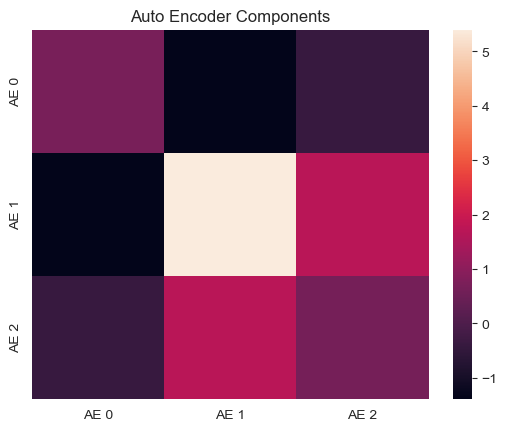

In [73]:
lambda_from_decoder_weights = pd.DataFrame(
    w2.T @ C @ w2,
    index = ['AE 0','AE 1','AE 2'],
    columns = ['AE 0','AE 1','AE 2']
)

sns.heatmap(
    lambda_from_decoder_weights, 
    annot = False
)
plt.title('Auto Encoder Components')
plt.show()

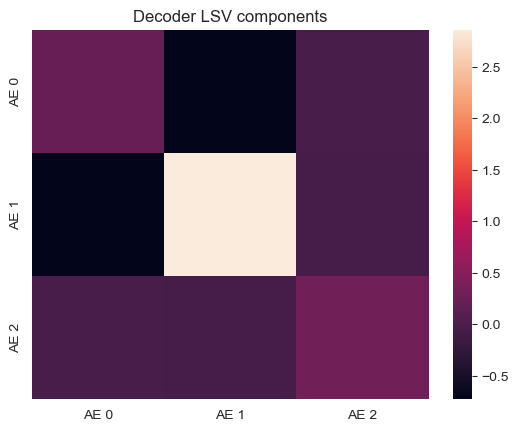

In [74]:
lambda_from_decoder_lsv = pd.DataFrame(
    ae_decoder_lsv.T @ C @ ae_decoder_lsv,
    index = ['AE 0','AE 1','AE 2'],
    columns = ['AE 0','AE 1','AE 2']
)

sns.heatmap(lambda_from_decoder_lsv, annot = False)
plt.title('Decoder LSV components')
plt.show()

In [75]:
print(100 * np.diag(lambda_from_decoder_lsv) / total_variance)
print('{:.6}% of total variance explained'.format(100*np.sum(np.diag(lambda_from_decoder_lsv)) / total_variance))

[ 6.49822571 83.96513983  9.39636692]
99.8597% of total variance explained


#### Reconstruct Data

In [76]:
model.eval() # evaluation model
with torch.no_grad() : # do not calculate gradient
    df_ae_recon = model(y)
    
df_ae_recon = df_ae_recon.numpy()

In [78]:
df_ae_recon = pd.DataFrame(
    df_ae_recon,
    index = bond_rate.index,
    columns = bond_rate.columns
)

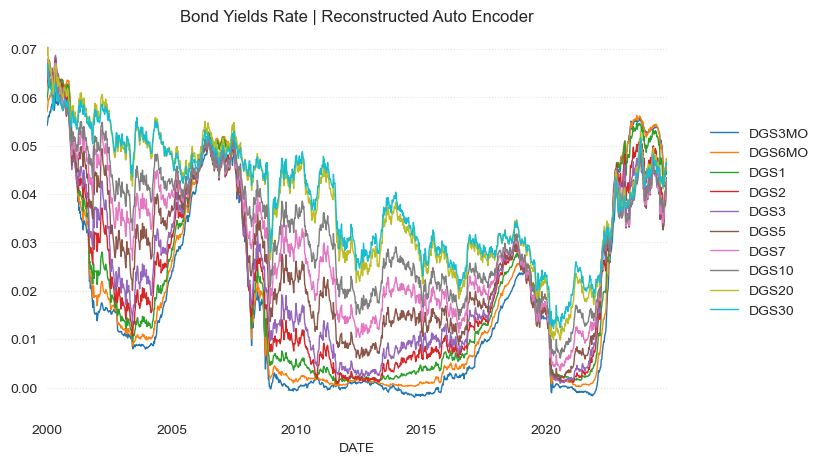

In [79]:
fig, ax = plt.subplots(figsize = (8, 5))
df_ae_recon.plot(ax = ax, lw = 1)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5), frameon = False)
plt.title(r'Bond Yields Rate | Reconstructed Auto Encoder')
plt.show()

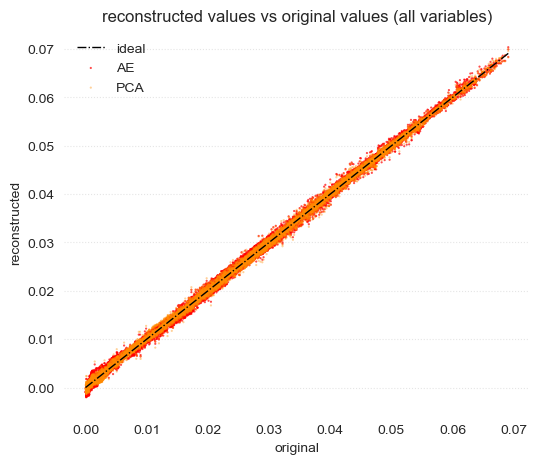

In [85]:
xy = np.linspace(bond_rate.values.min(), bond_rate.values.max(), 2)

fig, ax = plt.subplots(figsize = (6, 5))
plt.plot(xy, xy, c = 'black', lw = 1, ls = '-.') # y = x
plt.scatter(bond_rate.values, df_ae_recon, marker = '.', alpha = 0.7, s = 10, edgecolor = 'none', color = 'red') 
plt.scatter(bond_rate.values, df_pca_recon, marker = '.', alpha = 0.4, s = 10, edgecolor = 'none', color = 'darkorange') 
plt.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('original')
plt.ylabel('reconstructed')
plt.legend(['ideal', 'AE', 'PCA'], frameon = False)
plt.title('reconstructed values vs original values (all variables)')
plt.show()